In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('data/data.csv', header=None, names=[
    'sex', 'length', 'diameter', 'height',
    'whole weight', 'shucked weight', 'viscera weight',
    'shell weight', 'rings'
])

In [37]:
df

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [38]:
number_of_snails = df['sex'].count()
sex_count = df['sex'].replace({'M': 'Male', 'F': 'Female', 'I': 'Infant'}).value_counts().to_frame()
sex_count['%'] = round((sex_count['count'] / number_of_snails) * 100, 2) 

In [39]:
sex_count

,count,%
sex,,
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


In [40]:
variables = ['length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings']
stats_list = []
for variable in variables:
    stats = {
        'mean': df[variable].mean(),
        'std': df[variable].std(),
        'min': df[variable].min(),
        '25%': df[variable].quantile(0.25),
        '50%': df[variable].quantile(0.5),
        '75%': df[variable].quantile(0.75),
        'max': df[variable].max(),
    }
    stats_list.append(stats)
stats_df = pd.DataFrame(stats_list, index=variables)

In [41]:
stats_df

,mean,std,min,25%,50%,75%,max
length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


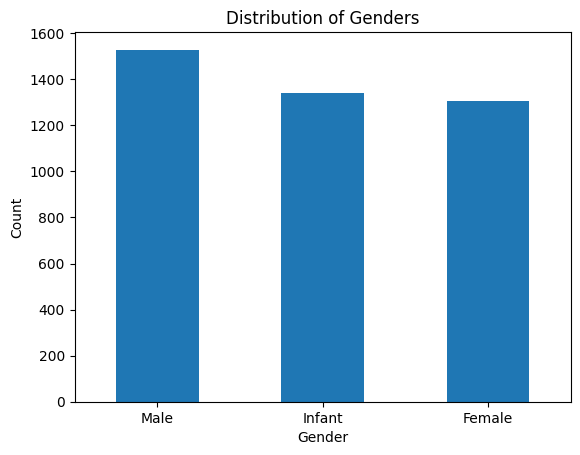

In [42]:
category_genders = df['sex'].replace({'M': 'Male', 'F': 'Female', 'I': 'Infant'}).value_counts()
category_genders.plot(kind='bar')
plt.title('Distribution of Genders')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()